# **79 DAPT SAO IH Hotel Booking**
**Predicting hotel booking cancellations with ML!**

Data source : [Link](https://www.kaggle.com/competitions/79-dapt-ih-hotel-booking/data)

The 79 DAPT SAO IH Hotel Booking describes two datasets with hotel demand data. One of the hotels is a resort hotel and the other is a city hotel. Both datasets share the same structure. Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. 

**Attribute Information:**  
1. hotel [Type of hotel]
2. is_cancelled [Value indicating if the booking was canceled (1) or not (0)]
3. lead_time [Number of days that elapsed between the entering date of the booking into the PMS and the arrival date]
4. stays_in_weekend_nights [Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel]
5. stays_in_week_nights [Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel]
6. adults [Number of adults]
7. children [Number of children]
8. babies [Number of babies]
9. meal [Type of meal booked]
10. country [Country of origin]
11. market_segment [Market segment designation]
12. distribution_channel [Booking distribution channe]
13. is_repeated_guest [Value indicating if the booking name was from a repeated guest (1) or not (0)]
14. previous_cancellations [Number of previous bookings that were cancelled by the customer prior to the current booking]
15. previous_bookings_not_canceled [Number of previous bookings not cancelled by the customer prior to the current booking]
16. reserved_room_type [Code of room type reserved]
17. assigned_room_type [Code for the type of room assigned to the booking. ]
18. booking_changes [Number of changes/amendments made to the booking]
19. deposit_type [Indication on if the customer made a deposit to guarantee the booking]
20. agent [ID of the travel agency that made the booking]
21. company [ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons]
22. days_in_waiting_list [Number of days the booking was in the waiting list before it was confirmed to the customer]
23. customer_type [Type of booking]
24. adr [Average Daily Rate calculated by dividing the sum of all lodging transactions by the total number of staying nights]
25. required_car_parking_spaces [Number of car parking spaces required by the customer]
26. total_of_special_requests [Number of special requests made by the customer]
27. reservation_status_date [Date at which the last status was set]
28. arrival_date [Date of arrival]
29. id_booking [ID of booking]


## Objective
Booking cancellations often directly impact a hotel's bottom line: many times the room(s) reserved are not booked again, resulting in lower occupation and, subsequently, revenue. To hedge this risk, hotels often demand a booking deposit, often calculated as a percentage of the reservations full price. However, this practice can directly impact demand as some customers might look for different hotels with no deposit (or a smaller one). **Our goal is to build a model that, by predicting whether a booking will be cancelled or not, can be used by the hotel to implement different risk-aware strategies for calculating the deposit size.**

In [1]:
!pip install opendatasets --quiet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import opendatasets as od
import warnings
warnings.filterwarnings('ignore')


plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Reading the data

In [3]:
url = 'https://www.kaggle.com/competitions/79-dapt-ih-hotel-booking/data'
od.download(url)

Skipping, found downloaded files in "./79-dapt-ih-hotel-booking" (use force=True to force download)


The folder contains three datasets:
- *tb_hotel_traintest.csv*  for training
- *tb_hotel_feat_valid_2.csv*  for testing
- *tb_hotel_sample_valid.csv* for submitting results

In [4]:
df_train = pd.read_csv('79-dapt-ih-hotel-booking/tb_hotel_traintest.csv')
df_test = pd.read_csv('79-dapt-ih-hotel-booking/tb_hotel_feat_valid_2.csv')
df_sample = pd.read_csv('79-dapt-ih-hotel-booking/tb_hotel_sample_valid.csv')

Let's check the shape of datasets

In [5]:
df_train.shape, df_test.shape, df_sample.shape

((113409, 29), (5981, 28), (5981, 2))

To analyse the dataset, I will group train and test datas in one dataframe

In [6]:
hotel_origin = pd.concat([df_train, df_test])

In [7]:
hotel_origin.shape

(119390, 29)

The dataset contains over 119390 rows and 29 columns

**Basic information about the data set**

In [8]:
hotel_origin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 0 to 5980
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_cancelled                    113409 non-null  float64
 2   lead_time                       119390 non-null  int64  
 3   stays_in_weekend_nights         119390 non-null  int64  
 4   stays_in_week_nights            119390 non-null  int64  
 5   adults                          119390 non-null  int64  
 6   children                        119386 non-null  float64
 7   babies                          119390 non-null  int64  
 8   meal                            119390 non-null  object 
 9   country                         118902 non-null  object 
 10  market_segment                  119390 non-null  object 
 11  distribution_channel            119390 non-null  object 
 12  is_repeated_guest 

In [9]:
hotel_origin.describe().T

,count,mean,std,min,25%,50%,75%,max
is_cancelled,113409.0,0.370658,0.482983,0.00,0.00,0.000,1.00,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.00,737.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.00,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.00,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.00,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.00,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.00,10.0
is_repeated_guest,119390.0,0.031912,0.175767,0.00,0.00,0.000,0.00,1.0
previous_cancellations,119390.0,0.087118,0.844336,0.00,0.00,0.000,0.00,26.0
previous_bookings_not_canceled,119390.0,0.137097,1.497437,0.00,0.00,0.000,0.00,72.0


I remark that the minimum of the average daily rate (`adr`) is negative, this is an absurd thing, since the `adr` is calculated by dividing of all *lodging transactions* by the total number of staying nights. Also knowing that by definition an *lodging transactions* means a charge to an occupant by a lodging operator for the occupancy of any short-term rental or vacation rental using a short-term rental marketplace.  
In short, it seems strange that a hotel accommodates customers and in addition gives them money. For that let's see how many customers have a negative `adr`.

In [10]:
hotel_origin[hotel_origin['adr'] < 0]['adr']

14214   -6.38
Name: adr, dtype: float64

In [11]:
hotel_origin.loc[[14214]]

,hotel,is_cancelled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date,id_booking
14214,Resort Hotel,0.0,195,4,6,2,0.0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,273.0,NaN,0,Transient-Party,-6.38,0,0,2017-03-15,2017-03-05,14969


We can see very well that it may have been a typing error, since there is only one customer who has a negative `adr`. According to the data, these are two adults who spent 11 days in a resort hotel. So I prefer to delete this line instead of making the `adr` positive, since there is no data on lodgging transactions.

In [12]:
hotel_origin.drop(index=14214, inplace=True)

This gave me the idea to see if there are customers who have spent a free stay in the hotel.

In [13]:
free_stay = hotel_origin[hotel_origin['adr'] == 0]
free_stay.head()

,hotel,is_cancelled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_date,id_booking
0,Resort Hotel,0.0,342,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,2015-07-01,2015-07-01,0
1,Resort Hotel,0.0,737,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,2015-07-01,2015-07-01,1
124,Resort Hotel,0.0,32,0,1,4,0.0,0,FB,PRT,Complementary,Direct,0,0,0,H,H,2,No Deposit,NaN,NaN,0,Transient,0.0,0,1,2015-07-05,2015-07-04,125
164,Resort Hotel,0.0,111,0,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,H,0,No Deposit,240.0,NaN,0,Transient,0.0,0,2,2015-07-06,2015-07-06,167
165,Resort Hotel,0.0,0,0,0,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,H,0,No Deposit,250.0,NaN,0,Transient,0.0,0,0,2015-07-06,2015-07-06,168


In [14]:
free_stay['adr'].count()

1959

In [15]:
round(free_stay['adr'].count() / len(hotel_origin) * 100., 2)

1.64

There are **1959** people who have benefited from a free stay, or **1.64%** of all reservations.

Let's see how this 1.64% is distributed over the two types of hotels.

In [16]:
free_stay.groupby(['hotel']).count()['adr']

hotel
City Hotel      1208
Resort Hotel     751
Name: adr, dtype: int64

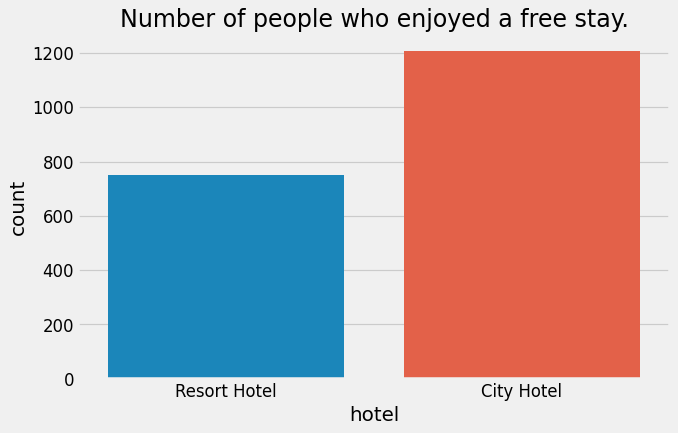

In [17]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('Number of people who enjoyed a free stay.')
sns.countplot(x='hotel', data=free_stay)
plt.show()

There is a difference of **37%** between the two hotels in favor of city hotels. Let's see if this percentage is also respected on all the data.

In [18]:
hotel_origin[hotel_origin['adr'] > 0].groupby(['hotel']).count()['adr']

hotel
City Hotel      78122
Resort Hotel    39308
Name: adr, dtype: int64

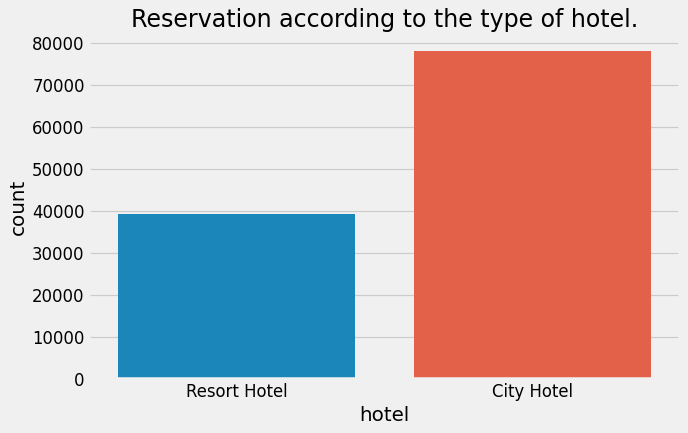

In [19]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('Reservation according to the type of hotel.')
sns.countplot(x='hotel', 
              data=hotel_origin[hotel_origin['adr'] > 0]
            )
plt.show()

As expected more than 50% of reservations were for city hotels

**Now, let's create a tally chart for each day of the week that people arrived.**

For this let's transform the `arrival_date` feature from object to date

In [20]:
hotel_origin['arrival_date'] = pd.to_datetime(hotel_origin['arrival_date'])

In [21]:
day_counter = hotel_origin['arrival_date'].dt.day_name().value_counts()

In [22]:
day_counter

Friday       19631
Thursday     19254
Monday       18171
Saturday     18055
Wednesday    16139
Sunday       14140
Tuesday      13999
Name: arrival_date, dtype: int64

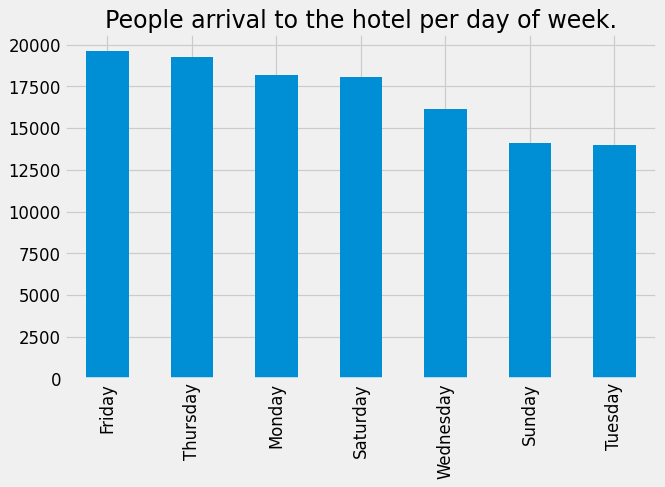

In [23]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('People arrival to the hotel per day of week.')
day_counter.plot.bar()
plt.show()

**Now, let's compare de top 10 countries from the people came.**

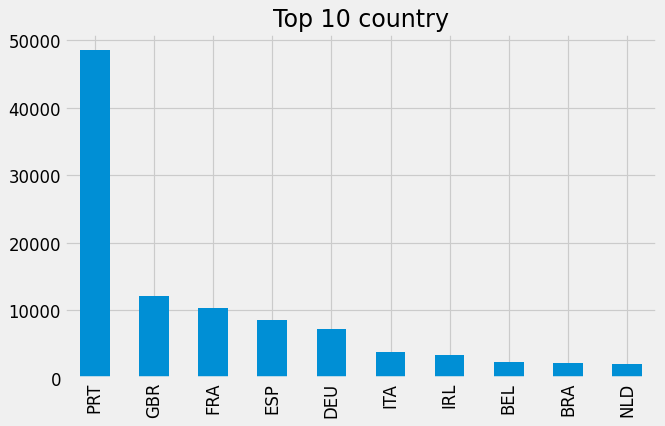

In [24]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('Top 10 country')
hotel_origin['country'].value_counts().head(10).plot.bar()
plt.show()

Most people come from Portugal

Let's see the average number of nights for a stay in hotel.

In [25]:
total_stay_days = hotel_origin['stays_in_week_nights'] + hotel_origin['stays_in_weekend_nights']
round(total_stay_days.mean(),2)

3.43

Let's see the average total cost of a stay.

In [26]:
total_paid = hotel_origin['adr'] * total_stay_days
round(total_paid.mean(),2)

357.85

Let's see the number of people who made special requests

In [27]:
hotel_origin['total_of_special_requests'].value_counts()

0    70317
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64

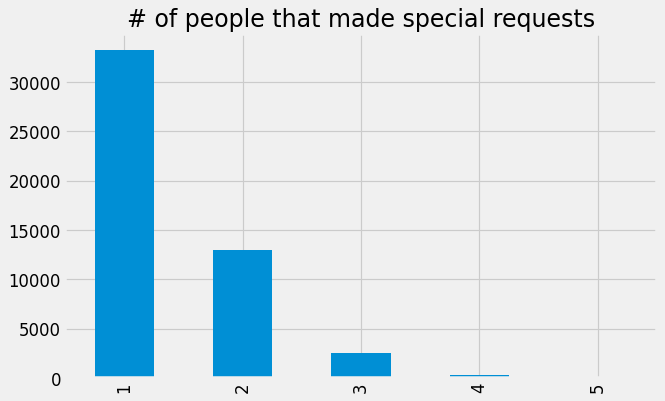

In [28]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('# of people that made special requests')
hotel_origin['total_of_special_requests'].value_counts()[1:].plot.bar()
plt.show()

Now, I would like to do an analysis according to the four seasons of the year. And since the data set does not contain a variable indicating the seasons, I will first create it and then continue the analysis.  
Now, I would like to do an analysis according to the four seasons of the year. And since the data set does not contain a variable indicating the seasons, I will first create it and then continue the analysis.
The problem that the season variable poses is that it associates days and months, so we will have to find a method that allows them to be associated in order to have an adequate result that respects the following pattern:  
  - winter: 21 Dec to 20 Mars
  - spring: 21 Mars to 20 Jun
  - summer: 21 Jun to 20 Sep
  - fall: 21 Sep to 20 Dec


Let's first see the minima and maxima of months and days

In [29]:
# min max month
hotel_origin['arrival_date'].dt.month.min(), hotel_origin['arrival_date'].dt.month.max()

(1, 12)

In [30]:
# min max day
hotel_origin['arrival_date'].dt.day.min(), hotel_origin['arrival_date'].dt.day.max()

(1, 31)

Now I'm going to add the days to the months and then multiply by 100 to keep the shape of the pattern the same

In [31]:
month_and_day = hotel_origin['arrival_date'].dt.day + hotel_origin['arrival_date'].dt.month * 100

In [32]:
month_and_day.min(), month_and_day.max()

(101, 1231)

101 means the first Jan and 1231 means the 31 of Dec

Now, let's create the season variable

In [33]:
season_period = ['winter', 'spring', 'summer', 'fall', 'winter2']

FROM_JAN_01 = 100
MARS_20 = 320
JUN_20 = 620
SEP_20 = 920
DEC_20 = 1220
DEC_31 = 1231

temp = pd.cut(
    month_and_day,
    bins=[FROM_JAN_01, MARS_20, JUN_20, SEP_20, DEC_20, DEC_31],
    labels=season_period
)

hotel_origin['season'] = temp.str.replace('2', '')

Let's group by this new feature

In [34]:
hotel_origin.groupby(['season']).mean()

,is_cancelled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,id_booking
season,,,,,,,,,,,,,,,,,,
fall,0.362193,103.348865,0.856958,2.283928,1.778422,0.057217,0.006270,0.035349,0.118196,0.124662,0.202532,80.057036,184.843418,3.948466,84.685349,0.060509,0.517459,56320.968766
spring,0.402984,108.393528,0.896470,2.466461,1.854869,0.087114,0.005678,0.028655,0.028302,0.148338,0.203177,90.558562,200.052196,3.294910,105.782876,0.054928,0.530656,62919.880171
summer,0.378158,130.400650,1.044908,2.760943,1.962107,0.162233,0.011295,0.019664,0.133478,0.091739,0.218039,84.506927,162.588492,0.674485,126.030507,0.066874,0.662784,59506.900433
winter,0.320083,55.826452,0.863427,2.371614,1.775368,0.086796,0.007795,0.052565,0.065108,0.207125,0.214615,92.145203,199.132168,1.719058,76.130202,0.068984,0.544552,58972.551825


Let's see the `adr` in terms of the seasons

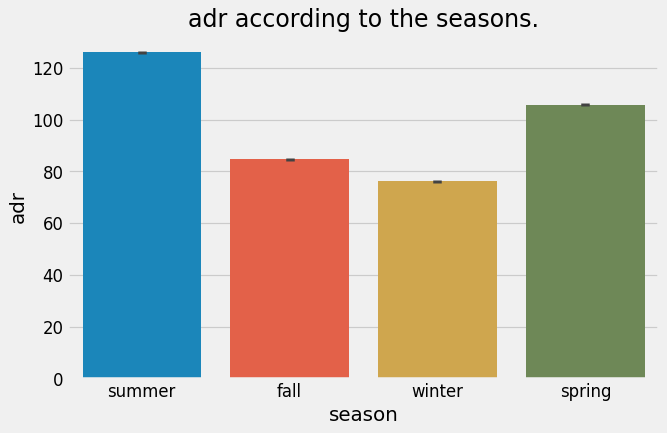

In [35]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('adr according to the seasons.')
sns.barplot(x='season', y='adr', data=hotel_origin)
plt.show()

The summer season is the season when the adr is at the max
Let's compare by hotels type.

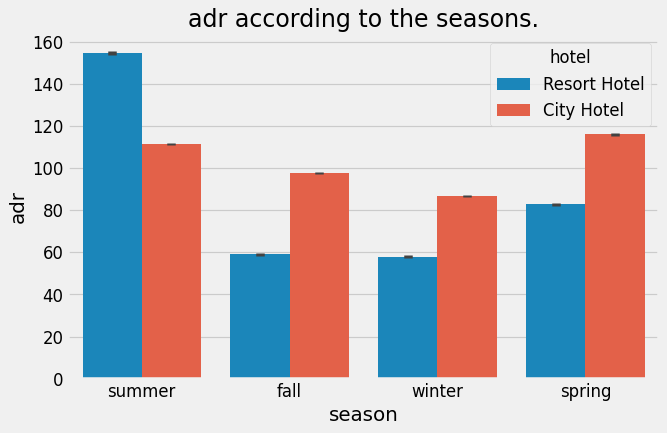

In [36]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('adr according to the seasons.')
sns.barplot(x='season', y='adr', data=hotel_origin, hue='hotel')
plt.show()

The most surprising is that although the city hotel attracts more customers than the hotel resort as seen in the previous graphs, in summer the hotel resort managed to attract more customers.

Let's see which month has the max of cancellations.

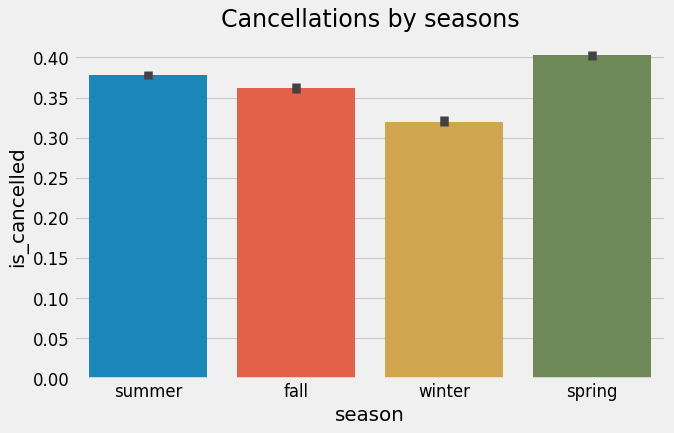

In [37]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('Cancellations by seasons')
sns.barplot(x='season', y='is_cancelled', data=hotel_origin)
plt.show()

It is quite normal that the maximum cancellation is in the spring because it is the beginning of the summer and people in general try to book in advance, unlike the winter in the fall.

Let’s see the distributions of the market according to the seasons

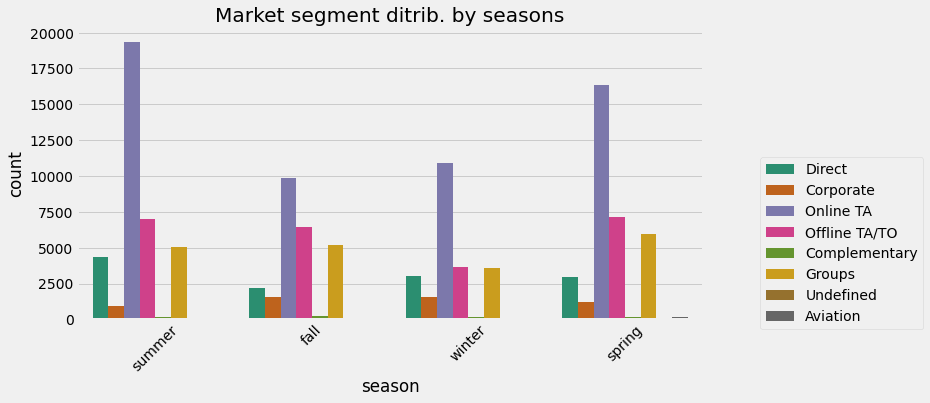

In [38]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.title('Market segment ditrib. by seasons')
sns.countplot(x='season', data=hotel_origin,
              hue='market_segment',
              palette='Dark2'
              )
plt.legend(bbox_to_anchor=(1.08, 0.58))
plt.show()

We note that the customers who have used a travel agent (TA) or a tour operator (TO), represent a maximum which is spread over all seasons and therefore all year round. But, what about the adr? Let's see if it's people spending the most or not?

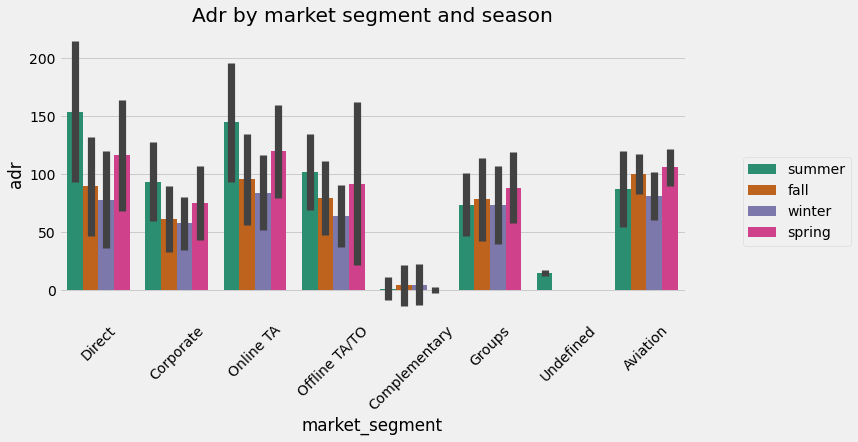

In [39]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.title('Adr by market segment and season')
sns.barplot(x='market_segment', y='adr', data=hotel_origin,
              hue='season',
              estimator=np.mean,
              ci='sd',
              palette='Dark2'
              )
plt.legend(bbox_to_anchor=(1.08, 0.58))
plt.show()

We see that they are not the only ones who spend the most and therefore they are not the only ones to spend the most days in the hotel.

Now I'm going to move on to some numeric variables and see if I can glean some useful information.

Let's compare week nights with weekend nights

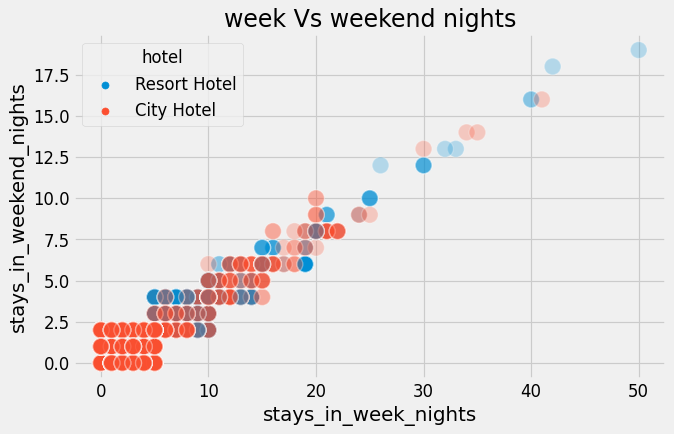

In [40]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('week Vs weekend nights')
sns.scatterplot(y='stays_in_weekend_nights', x='stays_in_week_nights',
                data=hotel_origin, hue='hotel', s=200, alpha=0.25
)
plt.show()

We see that there is a certain trend but it is not strong. Also we see that people prefer the city hotel but spend less time whether on weekends or other, but they prefer to spend long stays in the hotel resort.

Let's take a look at `previous_cancellations` and `previous_bookings_not_canceled` variables.

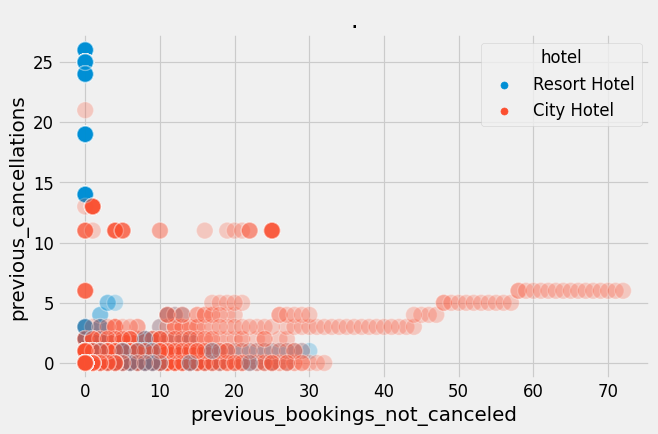

In [41]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('.')
sns.scatterplot(y='previous_cancellations', x='previous_bookings_not_canceled',
                data=hotel_origin, hue='hotel', s=200, alpha=0.25
)
plt.show()

We note that the majority of customers do not have a previous uncancelled reservation, either because they were satisfied or because it is their first reservation on the other side, we note that the maximum number of canceled reservations was made at the resort hotel.

Now, let's compare the total of special requests to the previous non-cancelled reservation

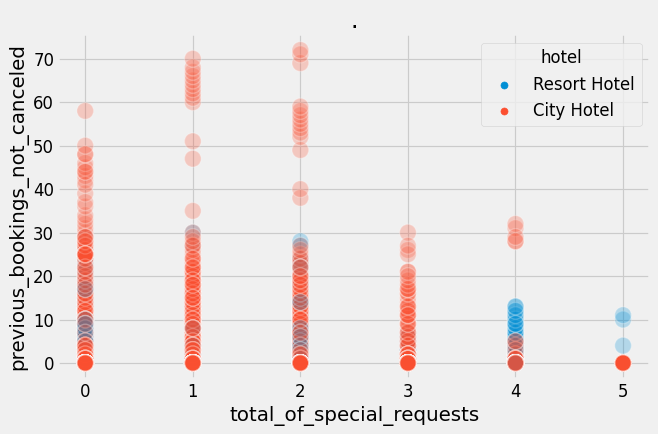

In [42]:
plt.figure(figsize=(8, 5), dpi=85)
plt.title('.')
sns.scatterplot(x='total_of_special_requests', y='previous_bookings_not_canceled',
                data=hotel_origin, hue='hotel', s=200, alpha=0.25
)
plt.show()

It is clear that the majority of customers have made little or no special request and this could give an idea of the quality of service in the hotel.

I'm completing the exploratory data analysis here, though there's still a ton of information to pull from. However, I will focus on feature engineering where I will still try to extract important information in order to establish a machine learning model that will be far from under/over fitting.

# Feature Engineering
In this part which is the most important of all and which is crucial for a good machine learning model, I will deal with the characteristics of features, namely quantifying the missing data if it exists and processing them in ways that respect the distribution of each variables. Then I move on to another step which consists of tracking down rare labels if there are any and processing them appropriately, then I will move on to numeric variables in order to detect the existence at no time of a strong bond or of multicollinearity. Finally I will finish by dealing with outliers.

## Feature Characteristics

### **Missing Data**

Let's see if our data set contains missing values

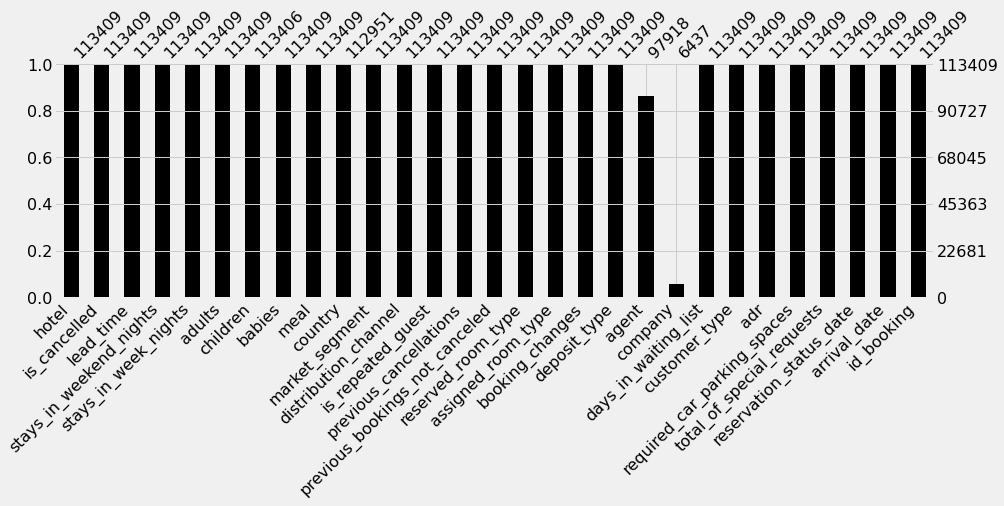

In [43]:
# NA train set
msno.bar(df_train, figsize=(14,4), color ='k');

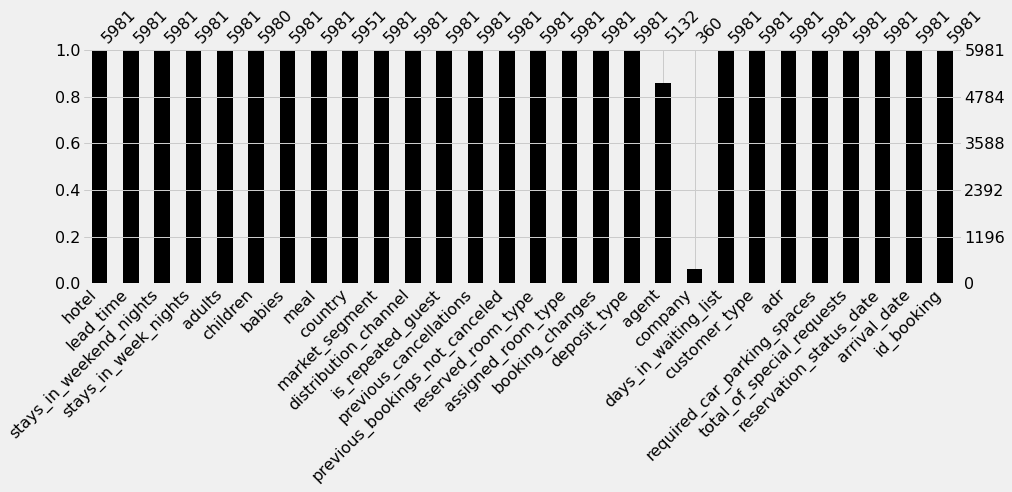

In [44]:
# NA test set
msno.bar(df_test, figsize=(14,4), color ='k');

Whether it is the train or the test set the missing values are apparently:

- children
- country
- agent
- company

I will quantify these missing data

In [45]:
def missing_data(df):
  '''Take a dataframe and quantify only variable with NA'''
  for col in df.columns:
    s = round(df[col].isna().mean() * 100, 3)
    if s > 0:
      print(f"{col}: {s}%")

In [46]:
# train set
missing_data(df_train)

children: 0.003%
country: 0.404%
agent: 13.659%
company: 94.324%


In [47]:
# test set
missing_data(df_test)

children: 0.017%
country: 0.502%
agent: 14.195%
company: 93.981%


There are over 93% missing values in the `company` variable and over 13% in the `agent` variable. `agent` is a categorical variable, this is ID of the travel agency that made the booking. ID is presented instead of designation for anonymity reasons. “NULL” is presented as one of the categories. This should not be considered a missing value, but rather as “not applicable”. For example, if a booking “Agent” is defined as “NULL” it means that the booking did not came from a travel agent.

So `agent` variable is **missing data Not At Random (MNAR)** since the **PMS** chose the give it *null* value. But, can we infer this by looking at the data?

Yes, If `agent` is **MNAR**, we could expect a greater number of missing values for cutomer who did **Not** make `online/offline` tour `agent/tour operator`.

The variable in question is market_segment, I will group all the agents according to this variable, then I will separate the TA and TO labels from the other labels, and calculate the rate of missing values. If the agent variable is really MNAR the rate of missing values with labels TA and TO should be much lower than the rate of missing values in the other labels of the same market_segment variable, since it is the indicator that the customer had to go through a travel agency or a tour operator or not.  

Let's look at this more in details.

In [48]:
# agent in the big dataframe that groupe train and test set
hotel_origin[['agent']].isnull().groupby(hotel_origin['market_segment']).mean()

,agent
market_segment,
Aviation,0.894515
Complementary,0.861373
Corporate,0.867611
Direct,0.476519
Groups,0.209389
Offline TA/TO,0.016062
Online TA,0.006162
Undefined,1.000000


In [49]:
# separate labels
ta = ['Online TA', 'Offline TA/TO']
singular = ['Groups', 'Direct', 'Corporate', 'Complementary', 'Aviation', 'Undefined']

# percentage of NA in TA/TO
ta_to_agent = hotel_origin[hotel_origin.market_segment.isin(ta)][['agent']]
ta_to_agent.isna().sum() * 100. / len(ta_to_agent)

agent    0.913304
dtype: float64

In [50]:
# percentage of NA in other labels 
no_agent = hotel_origin[hotel_origin.market_segment.isin(singular)][['agent']]
no_agent.isna().sum() * 100. / len(no_agent)

agent    40.325123
dtype: float64

We note that the rate of missing values for customers who have gone through a travel agency or a tour operator, implying that they have gone through an `agent` is less than 1% more exactly **0.91**%, on the other hand the missing value rate for clients who did not go through an `agent` is 40%. This confirms by far our hypothesis that the missing values in the agent variable are not missing values and are **NMAR**.

#### **Treatment of the agent variable**
The question that now arises is how to deal with missing values of the `agent` variable?
Let's take a look at the different labels for this variable.

In [51]:
hotel_origin['agent'].nunique()

333

The `agent` variable contains 333 labels. let's display the top 15.

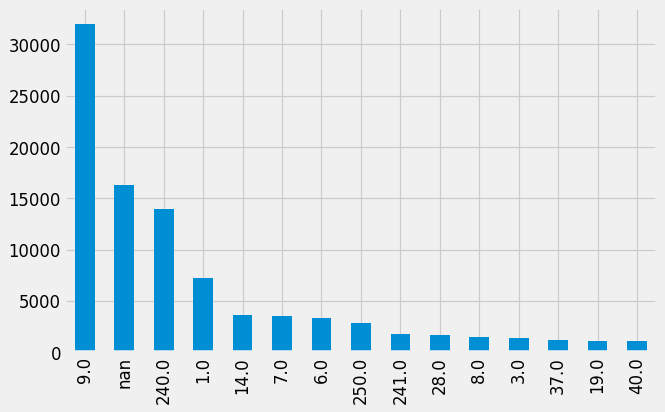

In [52]:
plt.figure(figsize=(8,5), dpi=85)
hotel_origin.agent.value_counts(dropna=False).head(15).plot.bar()
plt.show()

We note that the labels are numerical IDs in order to keep the anonymity of the travel agency. we also notice that the missing values ​​grouped together take second place in the top 15. The first idea we can say to ourselves is why not replace the missing values ​​with a numerical value of our choice and which is not already assign to a travel agency. Well, that's not a bad idea at all. But the problem is that the agent variable is categorical and not numeric. If we replace directly, we will fall into two obstacles. The first is that the machine learning model will consider any future value that comes from the agent variable as numeric and not categorical. The second thing is if we have not found an adequate value that respects the distribution of this variable, the information will be completely lost since we have distorted the original distribution.
The right choice would be to first make the agent variable mixed. That is to say, which contains in addition to the numerical labels a categorical label representing the missing values, then separate the numerical and categorical values ​​into new variables, so the model will be able to capture future labels even if they are numerical and even if we can't find an adequate value that respects the distribution, it doesn't matter since the categorical variable created will compensate for the deformation of the distribution.

**Transform to Mixte Variable**

In [53]:
# agent
df_train['agent'] = df_train['agent'].fillna('not agent')
df_test['agent'] = df_test['agent'].fillna('not agent')

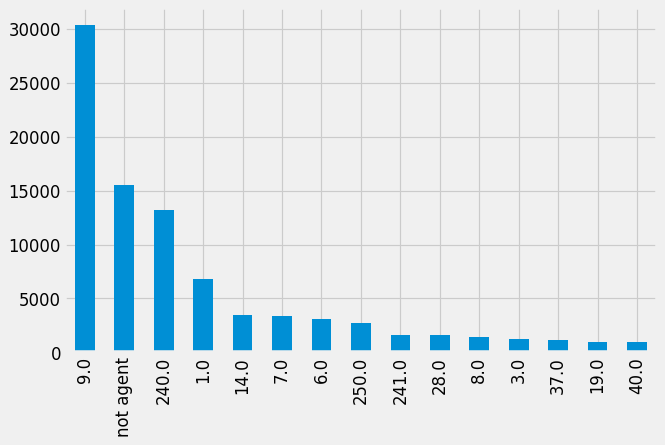

In [54]:
plt.figure(figsize=(8,5), dpi=85)
df_train['agent'].value_counts().head(15).plot.bar()
plt.show()

**Extract variables**

In [55]:
# agent train data set

# extract numerical part
df_train['agent_numeric'] = pd.to_numeric(
    df_train['agent'],
    errors='coerce',
    downcast='integer',
)

# extract categorical part
df_train['agent_categoric'] = np.where(
    df_train['agent_numeric'].isnull(),
    df_train['agent'],
    np.nan
)

# agent test data set

# extract numerical part
df_test['agent_numeric'] = pd.to_numeric(
    df_test['agent'],
    errors='coerce',
    downcast='integer',
)

# extract categorical part
df_test['agent_categoric'] = np.where(
    df_test['agent_numeric'].isnull(),
    df_test['agent'],
    np.nan
)

In [56]:
# labels of new variable agent_categoric
df_train['agent_categoric'].unique()

array(['not agent', nan], dtype=object)

for nan we can easily replaced with 'agent' and we get two categories

In [57]:
# agent categoric
df_train['agent_categoric'] = df_train['agent_categoric'].fillna("agent")
df_test['agent_categoric'] = df_test['agent_categoric'].fillna("agent")

In [58]:
df_train['agent_categoric'].unique()

array(['not agent', 'agent'], dtype=object)

**agent numeric variable distribution**

Now, I can want to replace NA values with a numeric value not contains as a label and at the same time respecting the original ditrib.

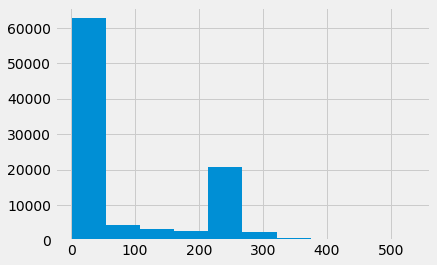

In [59]:
# ditribution of new variable agent_numeric
df_train['agent_numeric'].hist(bins=10);

the variable is distributed between 0 and 400. I'm going to test two numerical values close to the extremes and see which of them distorts the distribution the least.

In [60]:
# capt the extremes
sorted(df_train['agent_numeric'].unique().tolist())[1], sorted(df_train['agent_numeric'].unique().tolist())[-1]

(1.0, 535.0)

In [61]:
# create a copy of df_train for testing
df_copy = df_train.copy()
# replace NA with 536
df_copy = df_copy.fillna(536)
print(df_train.agent_numeric.var(), df_copy.agent_numeric.var())

12223.471825137043 34387.338452212156


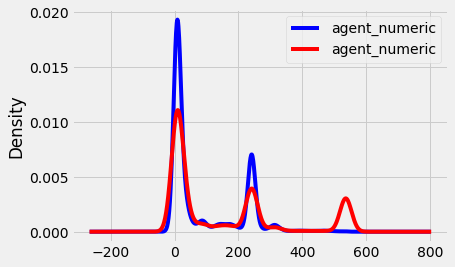

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
df_train['agent_numeric'].plot(kind='kde', ax=ax, color='blue')

# imputed variable
df_copy['agent_numeric'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

The value 536 distort the distribution. Let's try with -1

In [63]:
# replace NA with -1
df_copy = df_train.copy()
df_copy = df_copy.fillna(-1)
print(df_train.agent_numeric.var(), df_copy.agent_numeric.var())

12223.471825137043 11455.92343574555


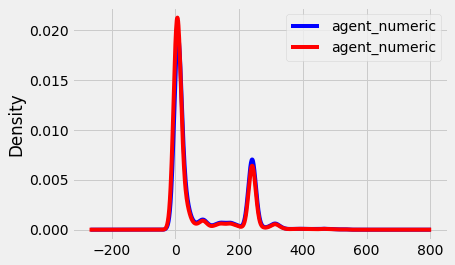

In [64]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
df_train['agent_numeric'].plot(kind='kde', ax=ax, color='blue')

# imputed variable
df_copy['agent_numeric'].plot(kind='kde', ax=ax, color='red')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

We can see that **-1** has the closest variability to the original variable and preserve well the distribution. So let's fill missing values in new variable `agent_numeric` with **-1**.

In [65]:
# agent numeric
df_train['agent_numeric'] = df_train['agent_numeric'].fillna(-1)
df_test['agent_numeric'] = df_test['agent_numeric'].fillna(-1)

#### **Treatment of the company variable**
For the company variable I will redo the same work as before.

In [66]:
# company
df_train['company'] = df_train['company'].fillna('not company')
df_test['company'] = df_test['company'].fillna('not company')

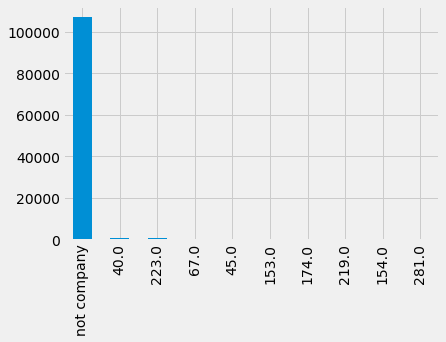

In [67]:
df_train['company'].value_counts().head(10).plot.bar();

In [68]:
# company

# company train dat set
# extract numerical part
df_train['company_numeric'] = pd.to_numeric(
    df_train['company'],
    errors='coerce',
    downcast='integer',
)

# extract categorical part
df_train['company_categoric'] = np.where(
    df_train['company_numeric'].isnull(),
    df_train['company'],
    np.nan
)

# company test dat set
# extract numerical part
df_test['company_numeric'] = pd.to_numeric(
    df_test['company'],
    errors='coerce',
    downcast='integer',
)

# extract categorical part
df_test['company_categoric'] = np.where(
    df_test['company_numeric'].isnull(),
    df_test['company'],
    np.nan
)

In [69]:
# agent categoric
df_train['company_categoric'] = df_train['company_categoric'].fillna("company")
df_test['company_categoric'] = df_test['company_categoric'].fillna("company")

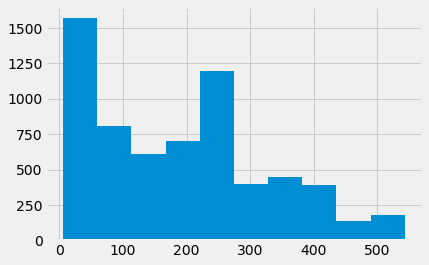

In [70]:
df_train['company_numeric'].hist(bins=10);

In [71]:
sorted(df_train['company_numeric'].unique().tolist())[1], sorted(df_train['company_numeric'].unique().tolist())[-1]

(6.0, 543.0)

In [72]:
df_copy = df_train.copy()
df_copy['company_numeric_1'] = df_copy['company_numeric'].fillna(-1)
df_copy['company_numeric'].var(), df_copy['company_numeric_1'].var()

(17313.27982082493, 2919.237969736663)

In [73]:
df_copy['company_numeric_5'] = df_copy['company_numeric'].fillna(5)
df_copy['company_numeric'].var(), df_copy['company_numeric_5'].var()

(17313.27982082493, 2798.9732660107898)

In [74]:
df_copy['company_numeric_544'] = df_copy['company_numeric'].fillna(544)
df_copy['company_numeric'].var(), df_copy['company_numeric_544'].var()

(17313.27982082493, 7722.258974818397)

In [75]:
df_copy['company_numeric_999'] = df_copy['company_numeric'].fillna(999)
df_copy['company_numeric'].var(), df_copy['company_numeric_999'].var()

(17313.27982082493, 36091.925629368576)

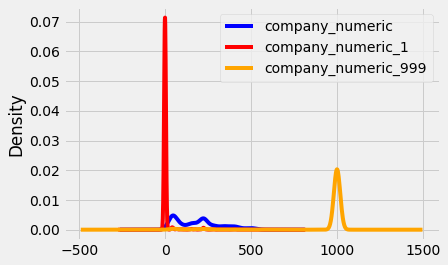

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
df_train['company_numeric'].plot(kind='kde', ax=ax, color='blue')

# imputed variable
df_copy['company_numeric_1'].plot(kind='kde', ax=ax, color='red')
# df_copy['company_numeric_5'].plot(kind='kde', ax=ax, color='green')
# df_copy['company_numeric_544'].plot(kind='kde', ax=ax, color='black')
df_copy['company_numeric_999'].plot(kind='kde', ax=ax, color='orange')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

We couldn't capture a value that respects the original distribution of the company variable, but that's okay since we have another categorical variable named `company_categoric` that will compensate for this lack. However I will replace the NA with **1**

In [77]:
# company numeric
df_train['company_numeric'] = df_train['company_numeric'].fillna(1)
df_test['company_numeric'] = df_test['company_numeric'].fillna(1)

#### **Treatment of `children` and `country` variables.**

One can ask the question why the `children` and `country` variables are missing? The answer may be that the manager either forgot to request this information from the customer, or he forgot to put it in the PMS database. In both cases it can be seen that these two variables are missing completely at random (MCAR) because the probability that a customer does not provide this information if asked is very low. So all observations of distinct variables have the same chance of being or not being missing.

#### **`children variable`**

Let's have a look at the ditribution

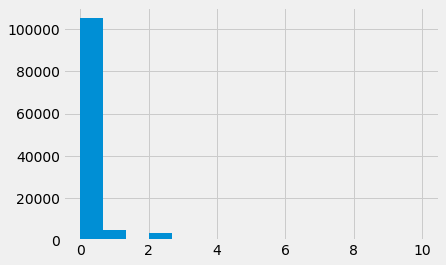

In [78]:
df_train['children'].hist(bins=15);

Since the variable children is MCAR and in addition it is very much lower than the threshold of 5% since it is 3 per thousand, either by replacing it with 0 or the mean or the median or even with the value of the IQR, the variable will preserve its original distribution.

In [79]:
df_copy['children_imputed'] = df_copy['children'].fillna(0)
df_train['children'].var(), df_copy['children_imputed'].var()

(0.15918198877813383, 0.15917806527322442)

In [80]:
train_child_mean = df_copy['children'].mean()
df_copy['children_mean'] = df_copy['children'].fillna(train_child_mean)
df_train['children'].var(), df_copy['children_mean'].var()

(0.15918198877813383, 0.15917777791147245)

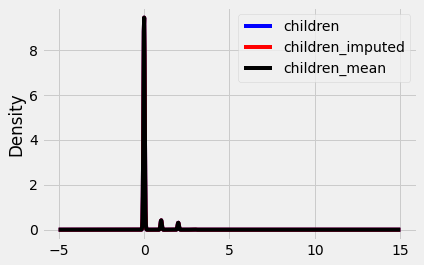

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
df_train['children'].plot(kind='kde', ax=ax, color='blue')

# imputed variable
df_copy['children_imputed'].plot(kind='kde', ax=ax, color='red')
df_copy['children_mean'].plot(kind='kde', ax=ax, color='k')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [82]:
# children
df_train['children'] = df_train['children'].fillna(0)
df_test['children'] = df_test['children'].fillna(0)

#### **`country variable`**

Since `country` variable is MCAR and represent 40 per thousand of missing value I will replace missing values with the most frequent label which is Portugal `PRT`.

Let's first compare the distributions using the `adr` variable.

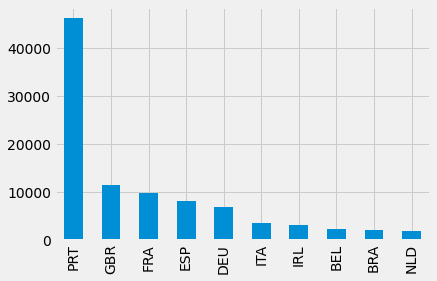

In [83]:
df_train['country'].value_counts(dropna=False).head(10).plot.bar();

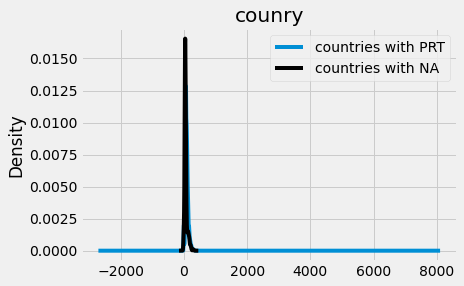

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111)

# select and plot countrie with the most frequent label
df_train[df_train['country']=='PRT']['adr'].plot(kind='kde', ax=ax)

# select and plot countries with missing data in the variable
df_train[df_train['country'].isnull()]['adr'].plot(kind='kde', ax=ax, color='k')

# add the legend
lines, labels = ax.get_legend_handles_labels()
labels = ['countries with PRT', 'countries with NA']
ax.legend(lines, labels, loc='best')

# add figure title
plt.title('counry')
plt.show()

The distrib is preserved.

In [85]:
# country
train_country_mode = df_train['country'].mode()[0]
df_train['country'] = df_train['country'].fillna(train_country_mode)
df_test['country'] = df_test['country'].fillna(train_country_mode)

In [86]:
missing_data(df_test)

### **Cardinality**

The problem of high cardinality is seen when the presence of rare labels does not bring any useful information, and when these rare labels are not processed they can:
- cause over-fitting, particularly in tree-based methods.
- Infrequent labels may add noise, which could cause over-fitting.
- be present only in training set, therefore causing over-fitting.
- appear only in the test set. Thus, the ML model will not know how to evaluate it.


Before capting rare labels if exists, I will transform values that must be in date format, retrieve the `season` variable that I added in the global dataframe `hotel_origin` in the previous section, also separate target `is_cancelled` from global matrix and also separte numerical and categorical features into two lists.

Let's do it this.

In [87]:
# to datetime
df_train['arrival_date'] = pd.to_datetime(df_train['arrival_date'])
df_test['arrival_date'] = pd.to_datetime(df_test['arrival_date'])
df_train['reservation_status_date'] = pd.to_datetime(df_train['reservation_status_date'])
df_test['reservation_status_date'] = pd.to_datetime(df_test['reservation_status_date'])

In [88]:
# season variable
month_and_day_train = df_train['arrival_date'].dt.day + df_train['arrival_date'].dt.month * 100
month_and_day_test = df_test['arrival_date'].dt.day + df_test['arrival_date'].dt.month * 100

season_period = ['winter', 'spring', 'summer', 'fall', 'winter2']
FROM_JAN_01 = 100
MARS_20 = 320
JUN_20 = 620
SEP_20 = 920
DEC_20 = 1220
DEC_31 = 1231

temp_train = pd.cut(
    month_and_day_train,
    bins=[FROM_JAN_01, MARS_20, JUN_20, SEP_20, DEC_20, DEC_31],
    labels=season_period
)

temp_test = pd.cut(
    month_and_day_test,
    bins=[FROM_JAN_01, MARS_20, JUN_20, SEP_20, DEC_20, DEC_31],
    labels=season_period
)

df_train['season'] = temp_train.str.replace('2', '')
df_test['season'] = temp_test.str.replace('2', '')

In [89]:
# target numerical and categorical variables

target = df_train [['is_cancelled']]

numerical = [
    'lead_time', 
    'stays_in_weekend_nights', 
    'stays_in_week_nights',
    'adults',
    'children',
    'babies',
    'previous_cancellations',
    'previous_bookings_not_canceled',
    'booking_changes',
    'days_in_waiting_list',
    'adr',
    'required_car_parking_spaces',
    'total_of_special_requests',
    'agent_numeric',
    'company_numeric',
]

categorical= [
    'hotel',
    'meal',
    'country',
    'market_segment',
    'distribution_channel',
    'reserved_room_type',
    'assigned_room_type',
    'deposit_type',
    'customer_type',
    'is_repeated_guest',
    'agent_categoric',
    'company_categoric',
    'season',
]

Let's have a look at the categorical variables.

In [90]:
# train set
for col in categorical:
  print(f"{col}: {len(df_train[col].unique())}")

hotel: 2
meal: 5
country: 174
market_segment: 8
distribution_channel: 5
reserved_room_type: 10
assigned_room_type: 12
deposit_type: 3
customer_type: 4
is_repeated_guest: 2
agent_categoric: 2
company_categoric: 2
season: 4


In [91]:
# test set
for col in categorical:
  print(f"{col}: {len(df_test[col].unique())}")


hotel: 2
meal: 5
country: 88
market_segment: 7
distribution_channel: 5
reserved_room_type: 9
assigned_room_type: 11
deposit_type: 3
customer_type: 4
is_repeated_guest: 2
agent_categoric: 2
company_categoric: 2
season: 4


The first thing I noticed is that 174 labels in the country variable will be seen, while only 88 will be tested. As I mentioned above rare labels in the train set will cause overffiting and in the test set will cause blocking or misprediction of the model.

To feel that Let's find labels present only in the training set and labels present only in the test set.

In [92]:
# labels only in train set
unique_to_train_set = [
    x for x in df_train['country'].unique() if x not in df_test['country'].unique()
]

# labels only in test set
unique_to_test_set = [
    x for x in df_test['country'].unique() if x not in df_train['country'].unique()
]
print(f"There are {len(unique_to_train_set)} Labels present only in train set")
print(unique_to_train_set)
print(f"There are {len(unique_to_test_set)} Labels present only in test set")
print(unique_to_test_set)

There are 89 Labels present only in train set
['BWA', 'SMR', 'CYM', 'ZWE', 'JAM', 'AND', 'GIB', 'URY', 'CAF', 'CYP', 'GGY', 'KWT', 'MDV', 'VEN', 'FJI', 'KAZ', 'PAK', 'SEN', 'SYC', 'AZE', 'BHR', 'DOM', 'MYS', 'LKA', 'CUB', 'CMR', 'BIH', 'COM', 'SUR', 'UGA', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'VNM', 'PLW', 'EGY', 'MLT', 'MWI', 'MDG', 'UZB', 'NPL', 'BHS', 'DJI', 'STP', 'ETH', 'IRQ', 'HND', 'RWA', 'KHM', 'MCO', 'BGD', 'IMN', 'TJK', 'NIC', 'BEN', 'VGB', 'GAB', 'GHA', 'TMP', 'GLP', 'GNB', 'MNE', 'UMI', 'MYT', 'FRO', 'MMR', 'PAN', 'BFA', 'LBY', 'NAM', 'BRB', 'ABW', 'AIA', 'SLV', 'PYF', 'GUY', 'LCA', 'ATA', 'GTM', 'ASM', 'MRT', 'NCL', 'KIR', 'SDN', 'ATF', 'SLE', 'LAO']
There are 3 Labels present only in test set
['ZMB', 'MLI', 'DMA']


Let's deal with Rare Labels.

#### **Rare Labels**

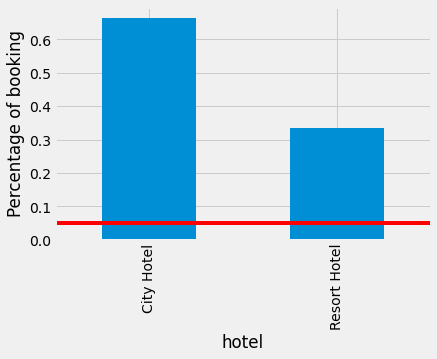

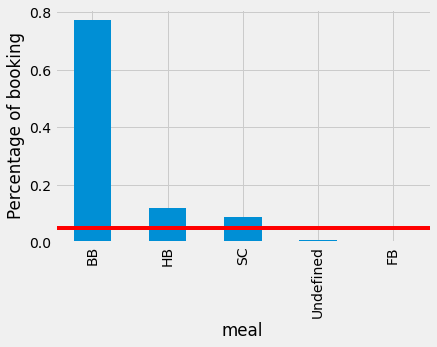

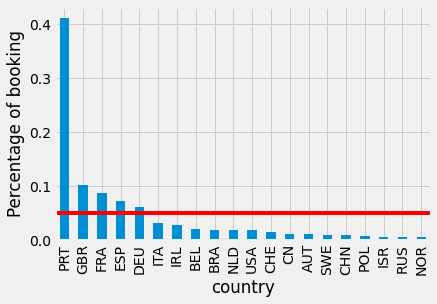

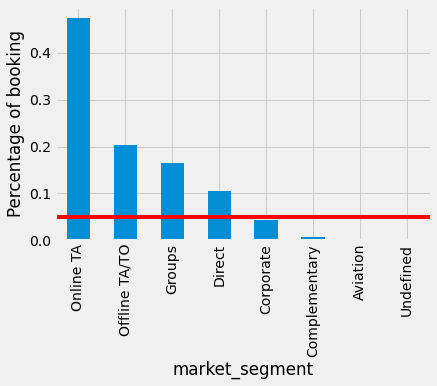

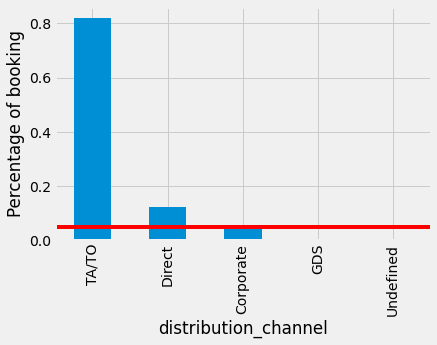

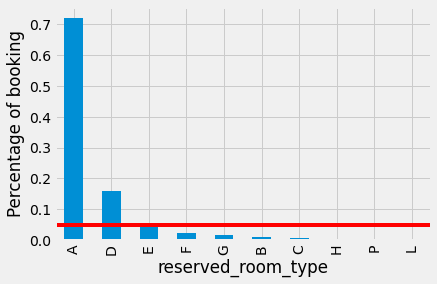

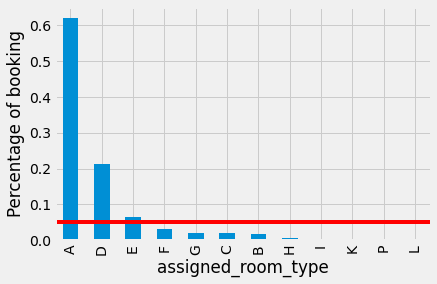

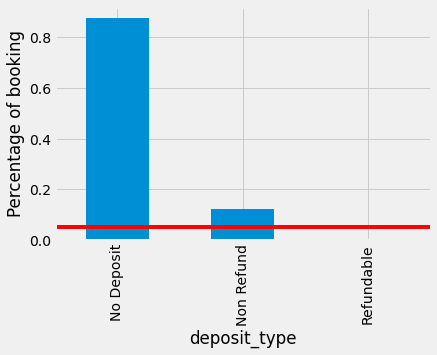

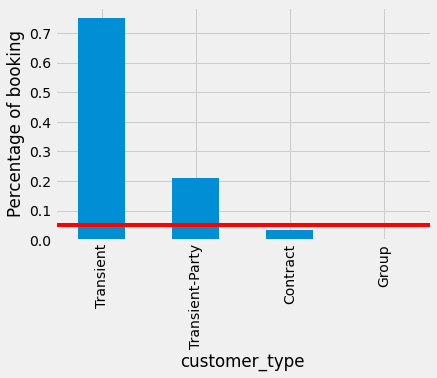

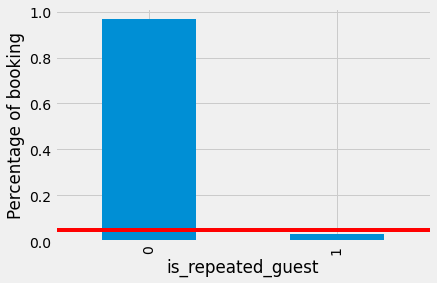

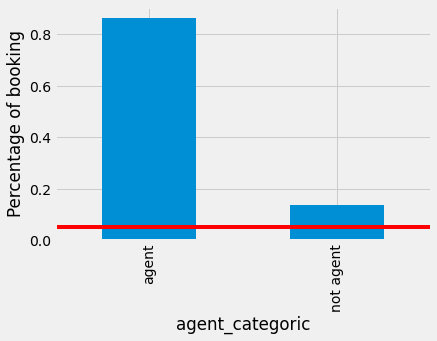

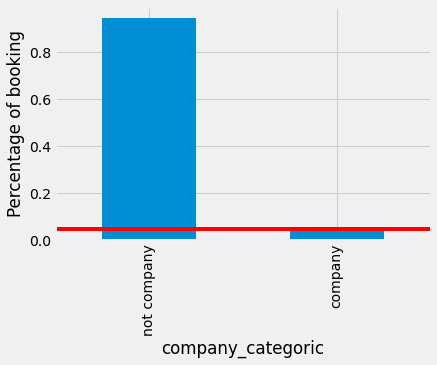

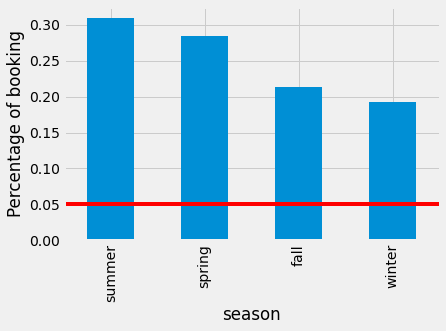

In [93]:
total_booking = len(df_train)

for col in categorical:
    temp_df = pd.Series(df_train[col].value_counts() / total_booking)

    fig = temp_df.head(20).sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    print()
    # Add a line at 5 % to flag the threshold for rare categories.
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of booking')
    plt.show()

In general, grouping infrequent labels or categories under a new category called 'Rare' or 'Other' is the common practice in machine learning for business, it may or may not improve model performance, however, we will re-group them into a new category to smooth model deployment and why not  improve model performance.

For that, I will install feature engine library, put categorical variable with string labels into a list and then proceed.


In [94]:
!pip install feature-engine --quiet

In [95]:
cat_rare = [
    'meal', 'country', 'market_segment', 'distribution_channel', 
    'reserved_room_type', 'assigned_room_type', 'deposit_type', 
    'customer_type'
]

In [96]:
from feature_engine.encoding import RareLabelEncoder

# Rare value encoder
rare_encoder = RareLabelEncoder(
    tol=0.05,  # minimal percentage to be considered non-rare
    n_categories=3, # minimal number of categories the variable should have to re-group rare categories
    variables=cat_rare # variables to re-group
)  

In [97]:
rare_encoder.fit(df_train[cat_rare])

RareLabelEncoder(n_categories=3,
                 variables=['meal', 'country', 'market_segment',
                            'distribution_channel', 'reserved_room_type',
                            'assigned_room_type', 'deposit_type',
                            'customer_type'])

In [98]:
rare_encoder.variables_

['meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type']

In [99]:
# the encoder_dict_ is a dictionary of variable: frequent labels pair
rare_encoder.encoder_dict_

{'meal': Index(['BB', 'HB', 'SC'], dtype='object'),
 'country': Index(['PRT', 'GBR', 'FRA', 'ESP', 'DEU'], dtype='object'),
 'market_segment': Index(['Online TA', 'Offline TA/TO', 'Groups', 'Direct'], dtype='object'),
 'distribution_channel': Index(['TA/TO', 'Direct', 'Corporate'], dtype='object'),
 'reserved_room_type': Index(['A', 'D', 'E'], dtype='object'),
 'assigned_room_type': Index(['A', 'D', 'E'], dtype='object'),
 'deposit_type': array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object),
 'customer_type': Index(['Transient', 'Transient-Party'], dtype='object')}

In [100]:
df_train[cat_rare] = rare_encoder.transform(df_train[cat_rare])
df_test[cat_rare] = rare_encoder.transform(df_test[cat_rare])

In [101]:
# labels only in train set
unique_to_train_set = [
    x for x in df_train['country'].unique() if x not in df_test['country'].unique()
]

# labels only in test set
unique_to_test_set = [
    x for x in df_test['country'].unique() if x not in df_train['country'].unique()
]
print(f"There are {len(unique_to_train_set)} Labels present only in train set")
print(unique_to_train_set)
print(f"There are {len(unique_to_test_set)} Labels present only in test set")
print(unique_to_test_set)

There are 0 Labels present only in train set
[]
There are 0 Labels present only in test set
[]


Now, that I have groupped rare labels, I don't have any unique rare labels either in train set or test set. So I avoid the overfitting or blocking my model.

### Encoding all categorical features

now I will encode all the categorical variables. For this, I will create two dataframes, a special one for the linear models where I will encode the variables using the one hot encoding, and another one for the ensemble models where I will encode the categorical variables using the label encoding.

#### **OHE for linear models**

In [102]:
# for one hot encoding with sklearn
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(
    categories='auto',
    drop='first',
    sparse=False,
    handle_unknown='error'
)
encoder.fit(df_train[categorical])

# create dataframes special for linear models
df_train_ohe = df_train.copy()
df_test_ohe = df_test.copy()

tmp_train = encoder.transform(df_train[categorical])
tmp_train = pd.DataFrame(tmp_train)
tmp_train.columns = encoder.get_feature_names_out()

tmp_test = encoder.transform(df_test[categorical])
tmp_test = pd.DataFrame(tmp_test)
tmp_test.columns = encoder.get_feature_names_out()

In [103]:
tmp_train.head()

,hotel_Resort Hotel,meal_HB,meal_Rare,meal_SC,country_ESP,country_FRA,country_GBR,country_PRT,country_Rare,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Rare,distribution_channel_Direct,distribution_channel_Rare,distribution_channel_TA/TO,reserved_room_type_D,reserved_room_type_E,reserved_room_type_Rare,assigned_room_type_D,assigned_room_type_E,assigned_room_type_Rare,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Transient,customer_type_Transient-Party,is_repeated_guest_1,agent_categoric_not agent,company_categoric_not company,season_spring,season_summer,season_winter
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [104]:
df_train_ohe = np.column_stack([df_train_ohe[numerical], tmp_train])
df_test_ohe = np.column_stack([df_test_ohe[numerical], tmp_test])

df_train_ohe = pd.DataFrame(df_train_ohe, columns=numerical+tmp_test.columns.to_list())
df_test_ohe = pd.DataFrame(df_test_ohe, columns=numerical+tmp_test.columns.to_list())

In [105]:
df_train_ohe.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,agent_numeric,company_numeric,hotel_Resort Hotel,meal_HB,meal_Rare,meal_SC,country_ESP,country_FRA,country_GBR,country_PRT,country_Rare,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Rare,distribution_channel_Direct,distribution_channel_Rare,distribution_channel_TA/TO,reserved_room_type_D,reserved_room_type_E,reserved_room_type_Rare,assigned_room_type_D,assigned_room_type_E,assigned_room_type_Rare,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Transient,customer_type_Transient-Party,is_repeated_guest_1,agent_categoric_not agent,company_categoric_not company,season_spring,season_summer,season_winter
0,342.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,737.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,7.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,13.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,304.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,14.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,98.0,0.0,1.0,240.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [106]:
df_test_ohe.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,agent_numeric,company_numeric,hotel_Resort Hotel,meal_HB,meal_Rare,meal_SC,country_ESP,country_FRA,country_GBR,country_PRT,country_Rare,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Rare,distribution_channel_Direct,distribution_channel_Rare,distribution_channel_TA/TO,reserved_room_type_D,reserved_room_type_E,reserved_room_type_Rare,assigned_room_type_D,assigned_room_type_E,assigned_room_type_Rare,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Transient,customer_type_Transient-Party,is_repeated_guest_1,agent_categoric_not agent,company_categoric_not company,season_spring,season_summer,season_winter
0,113.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,82.88,0.0,2.0,156.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,5.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,97.00,0.0,0.0,240.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,81.0,1.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,210.00,1.0,0.0,250.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,98.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,87.30,1.0,1.0,240.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,98.0,1.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,117.80,1.0,1.0,240.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [107]:
df_train_ohe.shape, df_test_ohe.shape

((113409, 47), (5981, 47))

### **Ordinal encoding for tree and ensemble models**

In [108]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

d = defaultdict(LabelEncoder)

# Encoding the variable
df_train[categorical] = df_train[categorical].apply(lambda x: d[x.name].fit_transform(x))

# # Using the dictionary to encode future data
df_test[categorical] = df_test[categorical].apply(lambda x: d[x.name].transform(x))

In [109]:
df_train.shape

(113409, 34)

Now let's move on to the numeric variables to see if there are any strong bindings or multicollinearity between them that can harm the model.

#### **Linear model assumption**

Let's plot a heatmap and visualize the relation between numerical variables

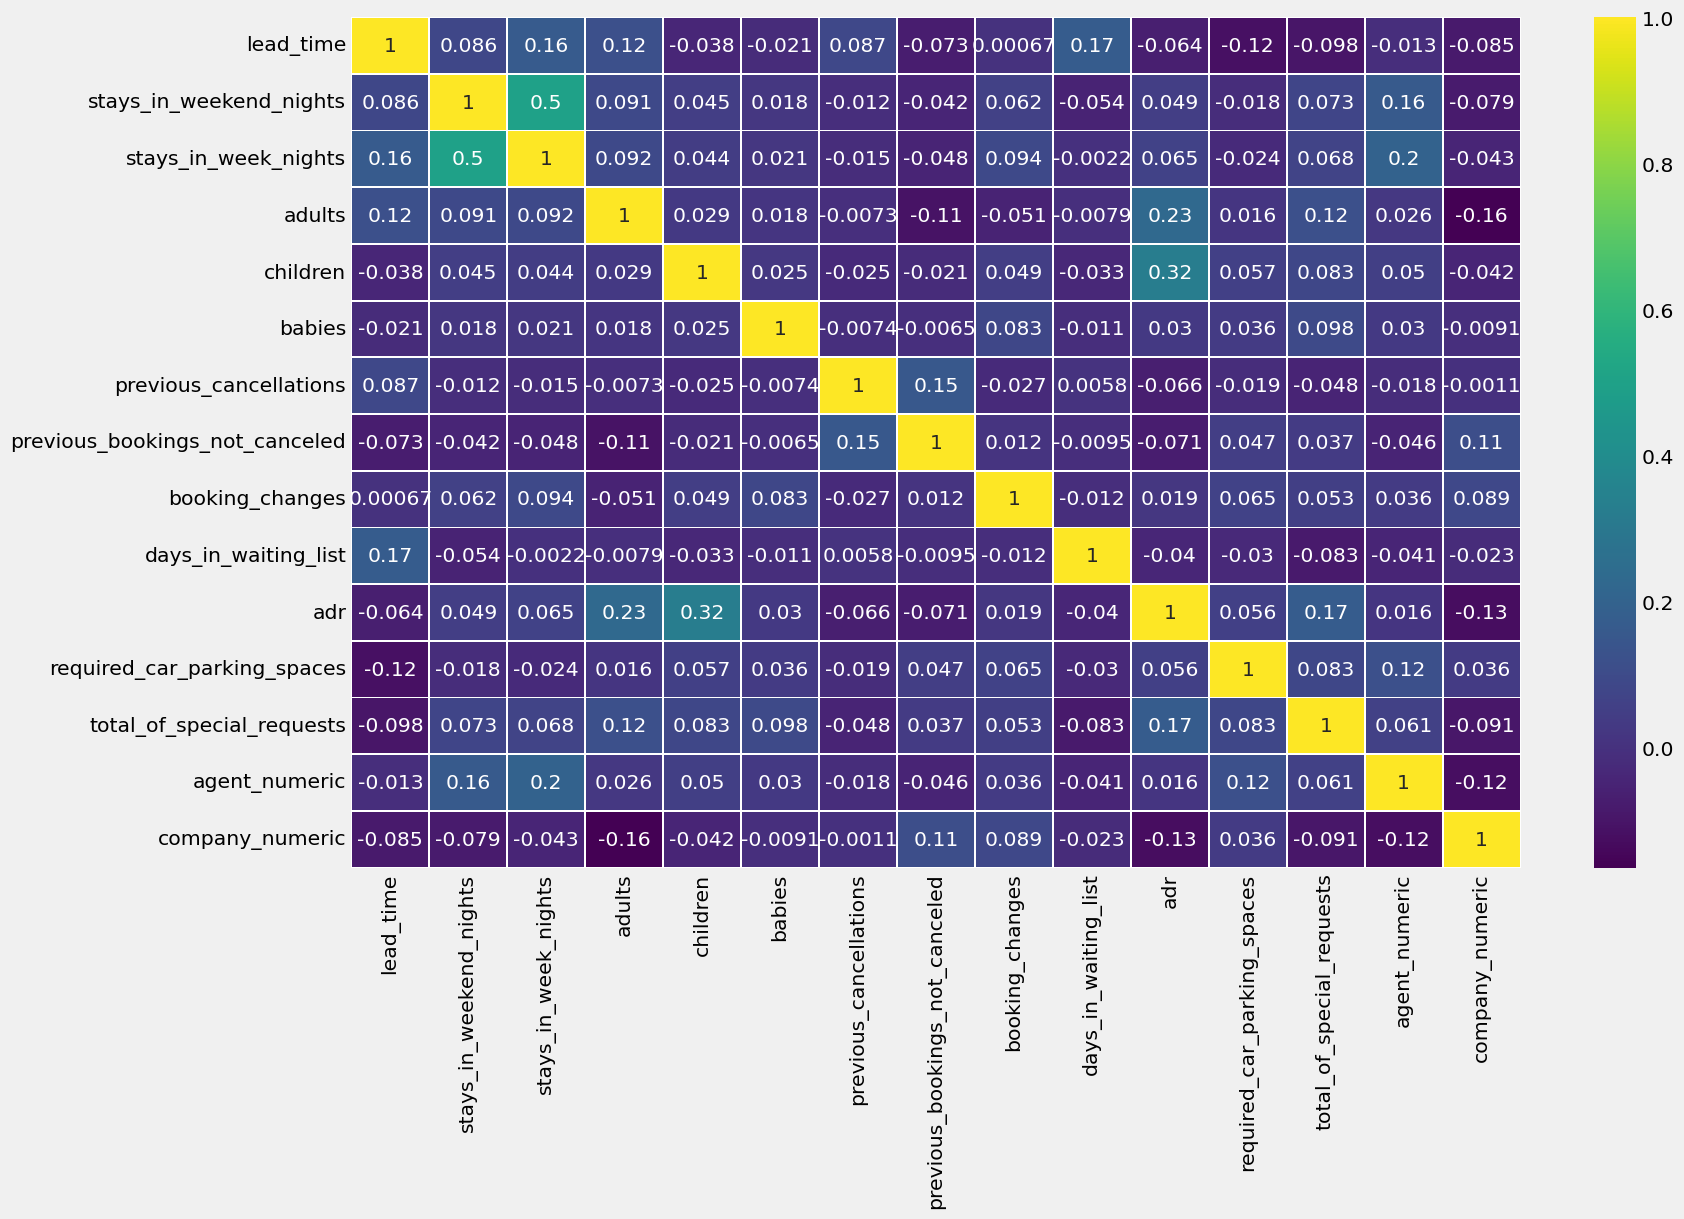

In [110]:
plt.figure(figsize=(16, 10), dpi=105)
sns.heatmap(df_train[numerical].corr(), 
            cmap='viridis',
            linewidth=0.5,annot=True
          )
plt.show()

Apart from the correlation between stay in weekend night and stay in week night which seems very average (50%) and which I dealt with in the analysis part, all the other variables present very weak links.

### **Dealing with Outliers**

For this last section, I will visualize the outliers and see how to treat them.

In [111]:
# for Q-Q plots
import scipy.stats as stats

# Function to create a histogram, a Q-Q plot and
# a boxplot.


def diagnostic_plots(df, variable):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')
    print()

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

lead_time



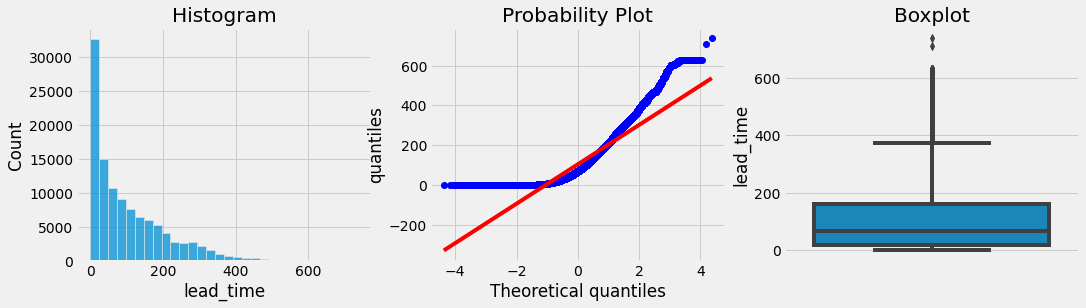


stays_in_weekend_nights



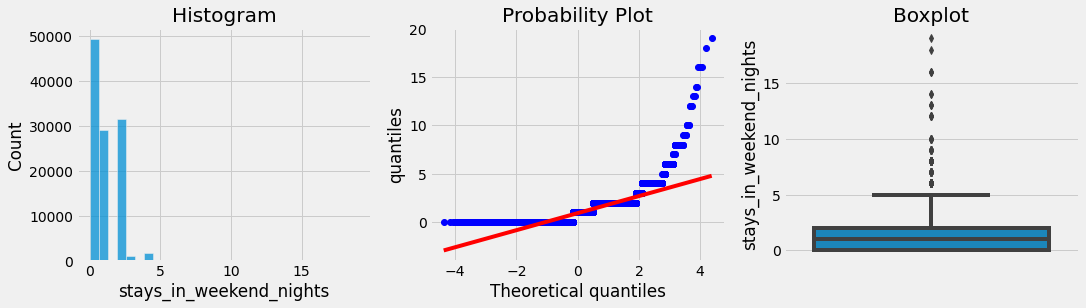


stays_in_week_nights



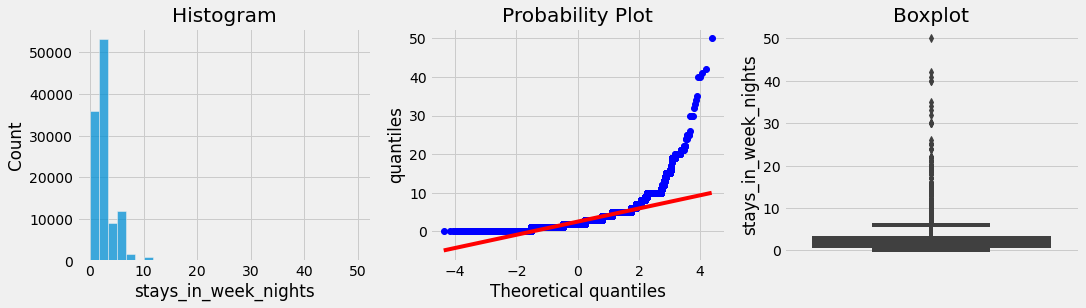


adults



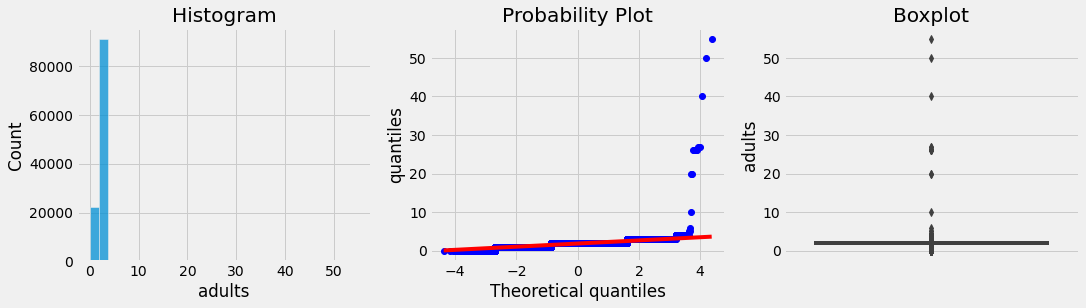


children



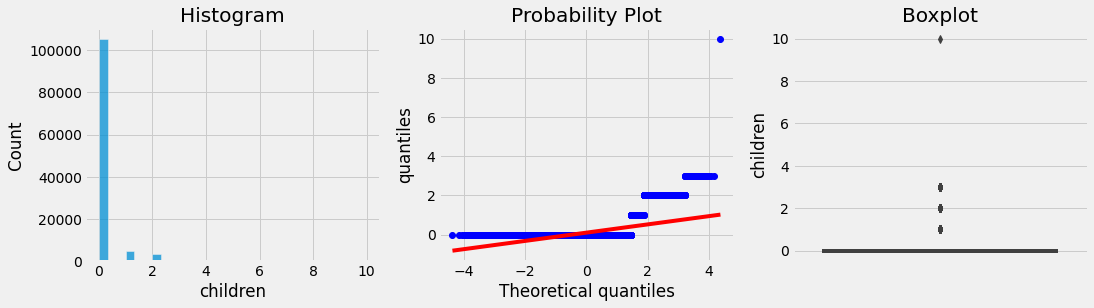


babies



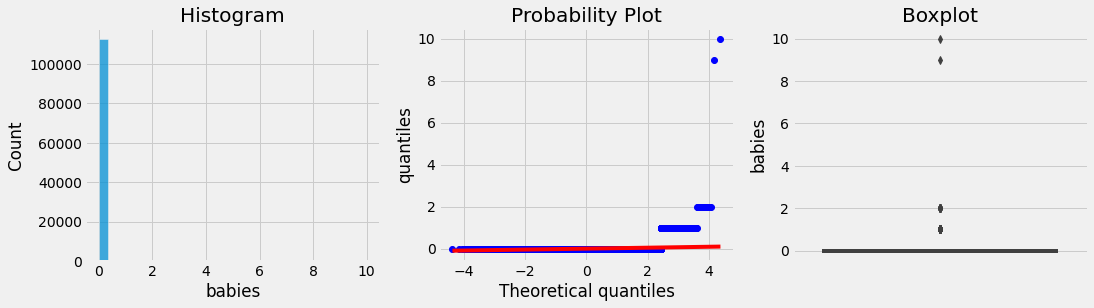


previous_cancellations



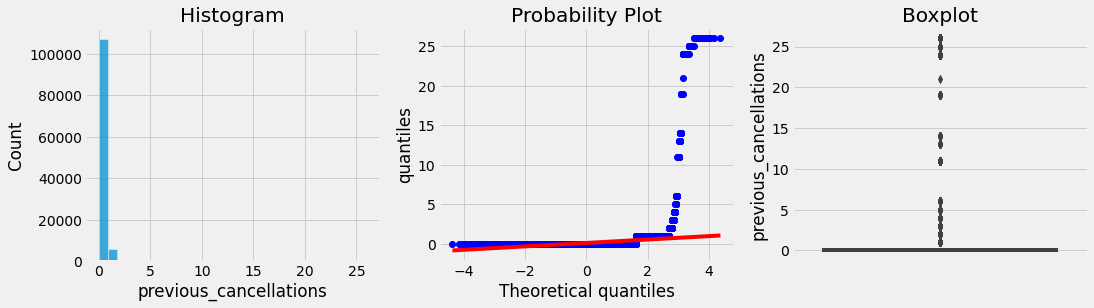


previous_bookings_not_canceled



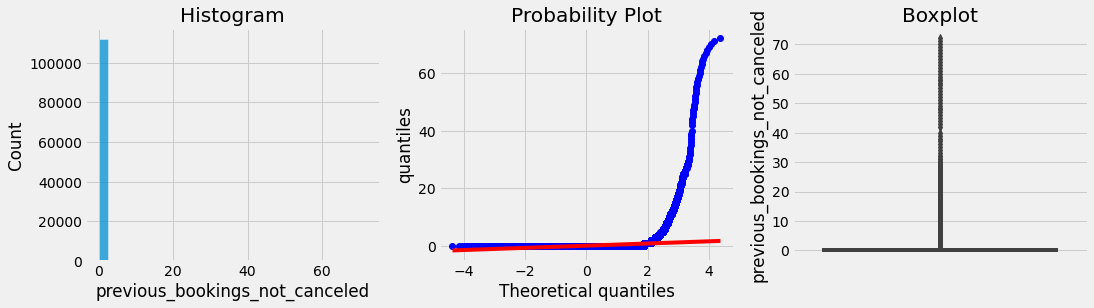


booking_changes



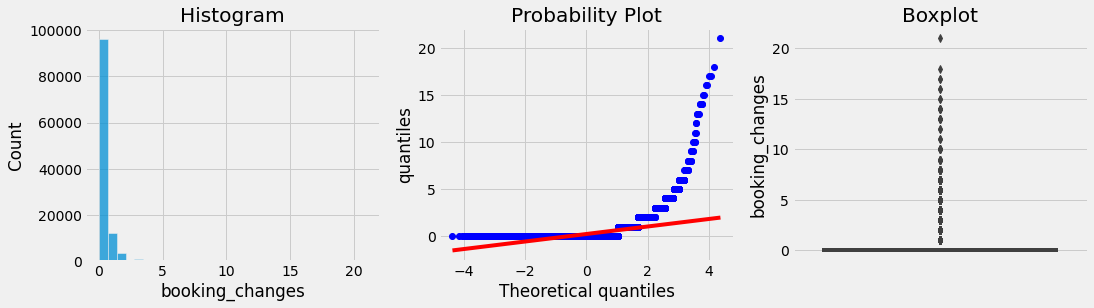


days_in_waiting_list



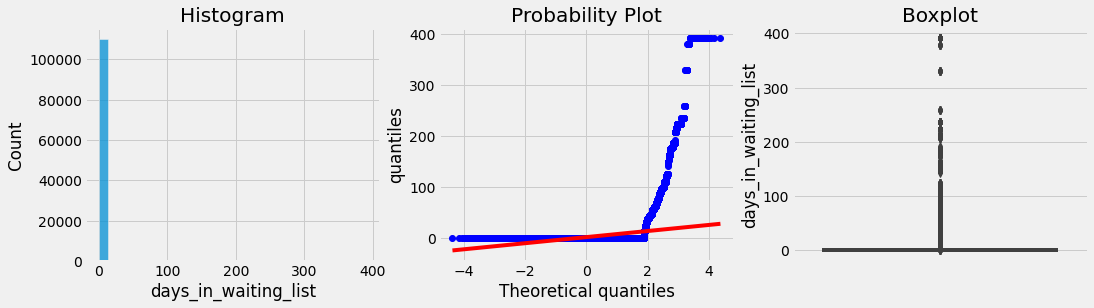


adr



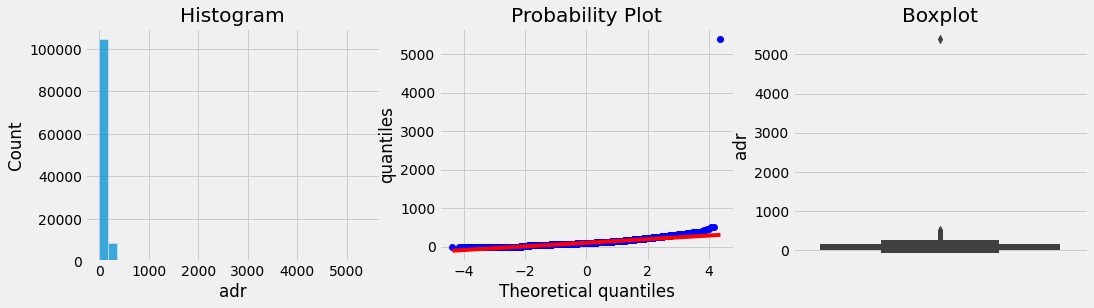


required_car_parking_spaces



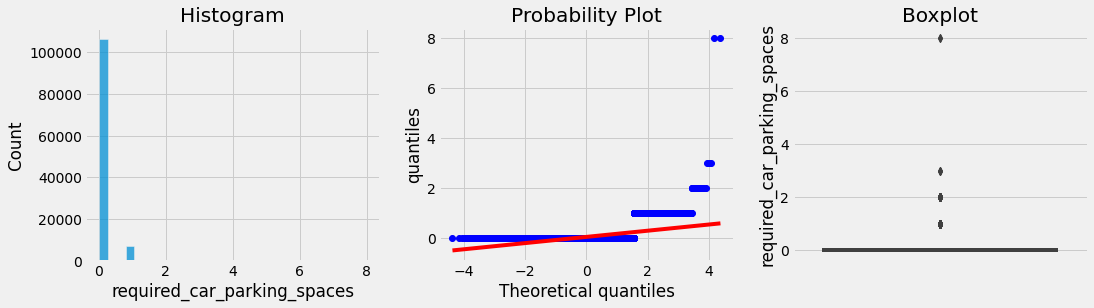


total_of_special_requests



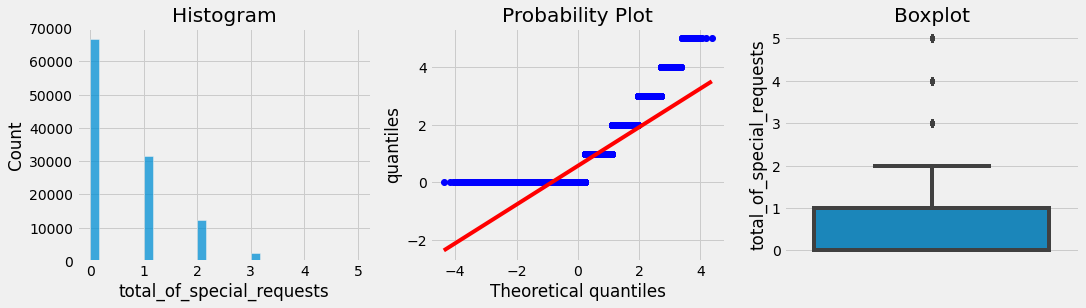


agent_numeric



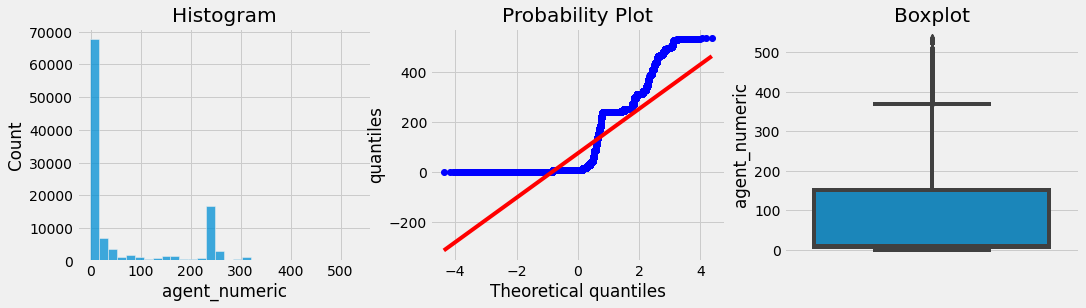


company_numeric



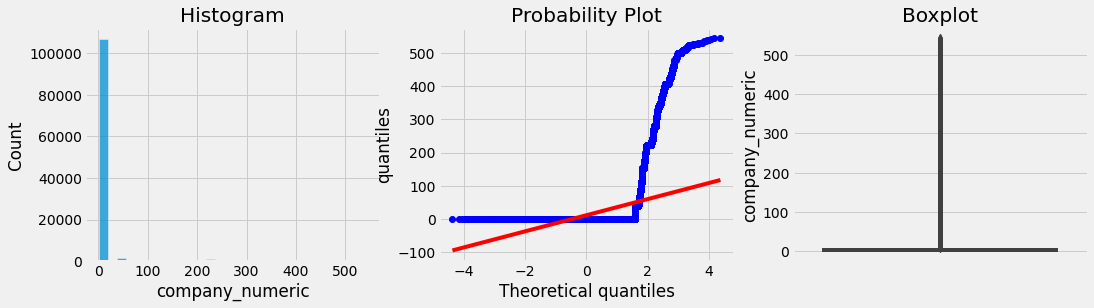

In [112]:
for col in numerical:
  print(col)
  diagnostic_plots(df_train, col)
  print()

Apart from the adr variable, all the other variables are skewed and not represent a guaussian distribution.

In [113]:
# Function to find upper and lower boundaries
# for skewed variables.


def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries
    # for skewed distributions

    # The parameter "distance" gives us the option to
    # estimate 1.5 times or 3 times the IQR when defining
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return lower_boundary, upper_boundary

In [114]:
for col in numerical:
  print(f"{col}:")
  boundaries = find_skewed_boundaries(df_train, col, 1.5)
  print(f"boundaries: {boundaries}")
  upper_boundary = boundaries[1]
  print(f"Percentage bigger than upper boundary: {100.*len(df_train[df_train[col] > upper_boundary])/len(df_train)}")
  print()

lead_time:
boundaries: (-196.5, 375.5)
Percentage bigger than upper boundary: 2.4953927818779813

stays_in_weekend_nights:
boundaries: (-3.0, 5.0)
Percentage bigger than upper boundary: 0.21515047306651147

stays_in_week_nights:
boundaries: (-2.0, 6.0)
Percentage bigger than upper boundary: 2.8057737922034405

adults:
boundaries: (2.0, 2.0)
Percentage bigger than upper boundary: 5.286176582105477

children:
boundaries: (0.0, 0.0)
Percentage bigger than upper boundary: 7.226939660873476

babies:
boundaries: (0.0, 0.0)
Percentage bigger than upper boundary: 0.769780176176494

previous_cancellations:
boundaries: (0.0, 0.0)
Percentage bigger than upper boundary: 5.440485323034327

previous_bookings_not_canceled:
boundaries: (0.0, 0.0)
Percentage bigger than upper boundary: 3.0226877937377106

booking_changes:
boundaries: (0.0, 0.0)
Percentage bigger than upper boundary: 15.13636483876941

days_in_waiting_list:
boundaries: (0.0, 0.0)
Percentage bigger than upper boundary: 3.1020465747868333

#### **Censoring outliers**

There are many ways to deal with outliers, however I will choose to constrain them.

In [115]:
from feature_engine.outliers import Winsorizer

# create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=numerical)

windsoriser.fit(df_train[numerical])

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['lead_time', 'stays_in_weekend_nights',
                      'stays_in_week_nights', 'adults', 'children', 'babies',
                      'previous_cancellations',
                      'previous_bookings_not_canceled', 'booking_changes',
                      'days_in_waiting_list', 'adr',
                      'required_car_parking_spaces',
                      'total_of_special_requests', 'agent_numeric',
                      'company_numeric'])

In [116]:
df_train_t = windsoriser.transform(df_train[numerical])

In [117]:
df_test_t = windsoriser.transform(df_test[numerical])

In [118]:
windsoriser.left_tail_caps_

{'lead_time': -196.5,
 'stays_in_weekend_nights': -3.0,
 'stays_in_week_nights': -2.0,
 'adults': 2.0,
 'children': 0.0,
 'babies': 0.0,
 'previous_cancellations': 0.0,
 'previous_bookings_not_canceled': 0.0,
 'booking_changes': 0.0,
 'days_in_waiting_list': 0.0,
 'adr': -15.499999999999986,
 'required_car_parking_spaces': 0.0,
 'total_of_special_requests': -1.5,
 'agent_numeric': -210.5,
 'company_numeric': 1.0}

In [119]:
windsoriser.right_tail_caps_

{'lead_time': 375.5,
 'stays_in_weekend_nights': 5.0,
 'stays_in_week_nights': 6.0,
 'adults': 2.0,
 'children': 0.0,
 'babies': 0.0,
 'previous_cancellations': 0.0,
 'previous_bookings_not_canceled': 0.0,
 'booking_changes': 0.0,
 'days_in_waiting_list': 0.0,
 'adr': 210.89999999999998,
 'required_car_parking_spaces': 0.0,
 'total_of_special_requests': 2.5,
 'agent_numeric': 369.5,
 'company_numeric': 1.0}

In [120]:
df_train[numerical] = windsoriser.transform(df_train[numerical])
df_test[numerical] = windsoriser.transform(df_test[numerical])

df_train_ohe[numerical] = windsoriser.transform(df_train[numerical])
df_test_ohe[numerical] = windsoriser.transform(df_test[numerical])

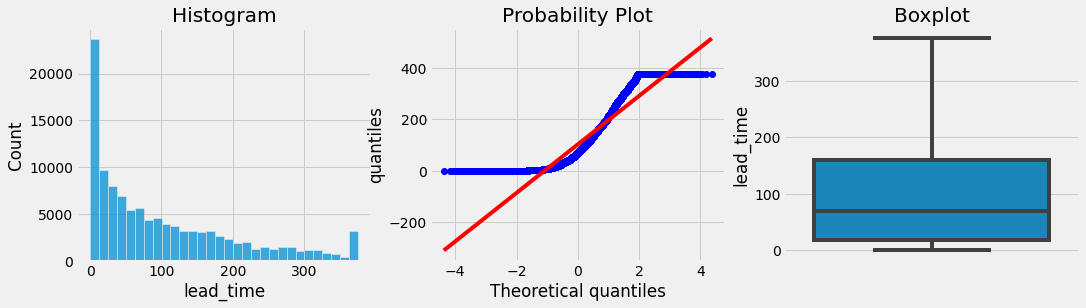

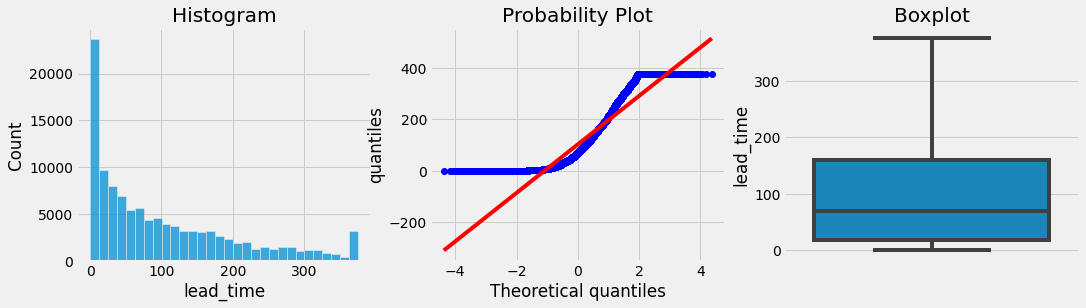

In [121]:
diagnostic_plots(df_train, numerical[0])
diagnostic_plots(df_train_t, numerical[0])

For example, for this `lead time` variable, comparing before and after censoring, we see the disappearance of outliers and the appearance of a plateau at the level of the Q-Qplot which clearly shows the censoring.

### Saving dataframes

Since the linear models needs that the numerical variables to be in the same scale, let's do it and then save the clean dataframes

In [138]:
# the scaler - for standardisation
from sklearn.preprocessing import StandardScaler

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(df_train_ohe[numerical])

# transform train and test set
df_train_ohe[numerical] = scaler.transform(df_train_ohe[numerical])
df_test_ohe[numerical] = scaler.transform(df_test_ohe[numerical])

In [150]:
all_columns = numerical + categorical

target.to_csv('target.csv', index=False)
df_train[all_columns].to_csv('df_train.csv', index=False)
df_test[all_columns].to_csv('df_test.csv', index=False)
df_train_ohe.to_csv('df_train_logit.csv', index=False)
df_test_ohe.to_csv('df_test_logit.csv', index=False)